# Classifying movie reviews as positive or negative.

> Binary classifaction is one of the most frequently used machine learning problem. In this example I will classify movie reviews from IMDB as positive or negative according to the review's text content.





## 1. Loading IMDB Dataset


---

To start with firstly, we need to load the dataset with the following code, the dataset comes with the keras package so we just need to simple import it. For this model I will use hold-out validation. This IMDB dataset consists of 50,000 reviews and they are split into 25,000 reviews for training set and 25,000 reviews for validation. It is important to set a set side a validation data to see if the model performs well on a never seen dataset. By setting num_words to 10,000 we are selecting the 10,000 most frequently used words.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

> train_data and test_data are a list of 25,000 reviews both of them are 2D arrays where train_data[x] is a specific review and train_data[x][y] is a word decoded into an intiger (as the number of words have been limited to 10.000 the maximum number what a word could have been decoded is 9999).




In [2]:
print('Length of train_data: ',len(train_data))
train_data

Length of train_data:  25000


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,



> train_labels and test_labels are 1D arrays with the length of 25,000 where each review has been manually labelled as positive=1 or negative=0.



In [3]:
print('Length of train_data: ',len(train_labels))
train_labels

Length of train_data:  25000


array([1, 0, 0, ..., 0, 1, 0])


> A way to decode back a review to English words.



In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

> Importing libraries.



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers

## 2. Preparing data


---

Before I feed my dataset into the neural network I need to turn my lists into tensors. For this I will use one-hot encode to turn the lists into vectors between 0s and 1s. Then I can use as the first layer in my network a Dense layer, capable of handling
floating-point vector data.


With the following code:
*   I create an all-zero matrix of shape (len(sequences), dimension). 
*   I set specific indices of results[i] to 1s.
*   Set x_train to vectorized training data.
*   Set x_test to vectorized test data.


In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


> Vectorize training and test labels.





In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. Building the model.


---




The input data is vectors and the labels are scalars. 0 if the review is laballed as negative and 1 if the review labelled as positive. I have choosen a network which performs well on such a problem a simple stack of fully connected Dense Layers, where the hidden layers will use relu as their activation function. Relu is an activiation function which turn a value into 0 if the number is less than 0 and leave the positive number as it was e.g relu(-3,2) = (0,2). Relu is the most common activation function in Deep Learning and we need it to extend the hypothesis space.

Initially we will start by having 2 hidden layers with 16 hidden units, which means the weight matrix W will have the shape of (input_dimension, 16) = (10000, 16) in the input layer. The output layer (third layer) will use sigmoid activation to output the probability a number between 0 and 1 depending on the prediction of the current review implicating how likely is that review is classified as positive (1 if its very likely).

In [7]:
![title]("relu-function.png")

/bin/sh: -c: line 0: syntax error near unexpected token `"relu-function.png"'
/bin/sh: -c: line 0: `[title]("relu-function.png")'


In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

We have 160,305 parameters in total. 

1.   In our first layer we have 10,000 x 16 + 16 = 160,016
2.   In the second layer 16x16 + 16 = 272.
3.   In the last layer we have 16x1 + 1 = 17







In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________




> To compile the model we need to choose a loss function and an optimizer. In this case our loss function will be a binary_crossentropy as this seems to be the best choice for binary classifications. We will use rmsprop as our optimizer. We need to set metrics to measure the accuracy of the model.



In [11]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])



> Configuring optimizer.



In [12]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])



> Using custom losses and metrics



In [13]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])



> To monitor the training I set aside 10000 examples for validation.

---





In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 4. Training the model.

Firstly I train the model only for 1 epoch.

In [15]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=1, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.4418 - acc: 0.8364




> With this network we get an 84% accuracy we can increase this number by having more epochs to avoid underfitting



Now I train the model for 20 epochs which means the model will go through the all the samples 20 times. In each epoch there will be mini-batches of 512 samples until it goes through all the sample in each epoch. In the same time I will also monitor the accuracy on the validation set by passing the validation_data argument.

In [15]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
original = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.4981 - acc: 0.7967 - val_loss: 0.3760 - val_acc: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2990 - acc: 0.9036 - val_loss: 0.3007 - val_acc: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2178 - acc: 0.9276 - val_loss: 0.2777 - val_acc: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1730 - acc: 0.9427 - val_loss: 0.3043 - val_acc: 0.8773
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1396 - acc: 0.9555 - val_loss: 0.2809 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1168 - acc: 0.9630 - val_loss: 0.2964 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0937 - acc: 0.9723 - val_loss: 0.3187 - val_acc: 0.8795
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0789 - a



> With this network I get an 85% accuracy now I will visualize the result to see where our network starts to overfit.



## Plotting the training and validation loss

In [16]:
original_dict = original.history
original_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
import matplotlib.pyplot as plt
    
def plot_loss():

    original_dict = original.history
    loss = original_dict['loss']
    val_loss = original_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()

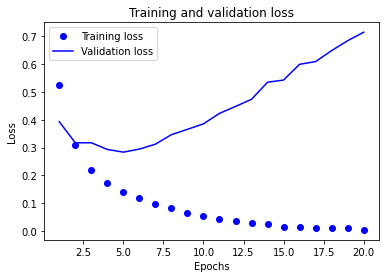

In [18]:
plot_loss()

In [19]:
def plot_acc():
    
    plt.clf()
    acc = original_dict['acc']
    val_acc = original_dict['val_acc']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

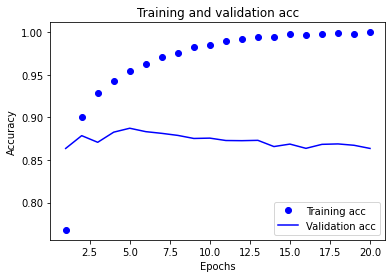

In [20]:
plot_acc()


> We can see that on the training dataset the network continously improves after each epoch the loss is getting smaller and the accuracy getting higher, but this is not the case with our validation set. This is an example of overfitting where we can see that my model overfits after the third epochs. This is because the model does not generalise and does not perform well on data which never seen before.



Firstly I will reduce the epochs to 4 by making a completely new network to stop overfiting then I try other techniques to reduce overfitting.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 36ms/step - loss: 0.4485 - accuracy: 0.8276 - val_loss: 0.2879 - val_accuracy: 0.9131
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2609 - accuracy: 0.9109 - val_loss: 0.1982 - val_accuracy: 0.9372
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2022 - accuracy: 0.9280 - val_loss: 0.1580 - val_accuracy: 0.9524
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8828




> With this approach we get 88% accuracy.



Now I will try to experiment with different approaches to see if we used the right number of layers or if we can find a better loss or activation function for this network.

### 1. Using more hidden layers only

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.4684 - accuracy: 0.8139 - val_loss: 0.2862 - val_accuracy: 0.9170
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2587 - accuracy: 0.9101 - val_loss: 0.2209 - val_accuracy: 0.9202
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2026 - accuracy: 0.9266 - val_loss: 0.1674 - val_accuracy: 0.9427
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3051 - accuracy: 0.8798




> We can see that increasing the network by having 3 hidden layers have resulted 88,7% accuracy, which is just slightly less than with 2 hidden layers therefore we can assume having extra layers won’t help our.



### 2. Using only one hidden layer.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 36ms/step - loss: 0.4426 - accuracy: 0.8342 - val_loss: 0.3058 - val_accuracy: 0.9032
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2764 - accuracy: 0.9069 - val_loss: 0.2244 - val_accuracy: 0.9318
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2173 - accuracy: 0.9264 - val_loss: 0.1923 - val_accuracy: 0.9354
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2801 - accuracy: 0.8887




> By having only 1 hidden layer have resulted 89% slightly better than our original 2 hidden layers network, but our validation accuracy has not improved.



### 3. Increasing hidden layer units.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 43ms/step - loss: 0.4349 - accuracy: 0.8137 - val_loss: 0.2546 - val_accuracy: 0.9216
Epoch 2/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2428 - accuracy: 0.9114 - val_loss: 0.2036 - val_accuracy: 0.9258
Epoch 3/4
49/49 [==============================] - 2s 38ms/step - loss: 0.1906 - accuracy: 0.9300 - val_loss: 0.1408 - val_accuracy: 0.9556
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3550 - accuracy: 0.8637




> With this approach we get 88% accuracy again and the accuracy on the validation set has improved.



### 4. Using mse loss function.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 40ms/step - loss: 0.1480 - accuracy: 0.8174 - val_loss: 0.0882 - val_accuracy: 0.9033
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.0781 - accuracy: 0.9092 - val_loss: 0.0593 - val_accuracy: 0.9361
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.0589 - accuracy: 0.9308 - val_loss: 0.0463 - val_accuracy: 0.9501
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.8830




> We can see that with mse loss function we different loss values and the accuracy is slightly higher 88.5%.



### 4. Using tanh as activation function instead of relu.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)



> We can see that with tanh activation on the validation set the accuracy has significantly improved but the we only got 87.6% accuracy



## Now I will try to utilize some of the most widely used regularization techniques to avoid overfitting:

*   Reducing Network Size
*   Adding weight regularization.
*   Adding dropout




To do this I will go back to our 20 epochs network to compare how this regularizations help to prevent overfitting.

### 1. Reducing network size.

I have already tried reducing the network by having less hidden layers lets see what happens if I reduce the number of units to 4 in the network.

In [21]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.5638 - accuracy: 0.8003 - val_loss: 0.4469 - val_accuracy: 0.8829
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3863 - accuracy: 0.8904 - val_loss: 0.3202 - val_accuracy: 0.9073
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2921 - accuracy: 0.9083 - val_loss: 0.2512 - val_accuracy: 0.9232
Epoch 4/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2386 - accuracy: 0.9220 - val_loss: 0.2136 - val_accuracy: 0.9305
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2054 - accuracy: 0.9309 - val_loss: 0.1839 - val_accuracy: 0.9400
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1816 - accuracy: 0.9375 - val_loss: 0.1609 - val_accuracy: 0.9484
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1636 - accuracy: 0.9440 - val_loss: 0.1450 - val_accuracy: 0.9537
Epoch 8/20
49

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

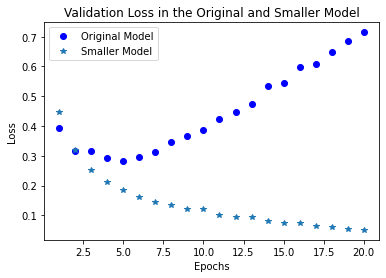

In [25]:
import matplotlib.pyplot as plt
    
def plot_val_loss():

    original_dict = original.history
    original_val_loss = original_dict['val_loss']
    history_dict = history.history
    history_val_loss = history_dict['val_loss']


    epochs = range(1, len(original_val_loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, original_val_loss, blue_dots, label = 'Original Model')
    plt.plot(epochs, history_val_loss, '*', label = 'Smaller Model')
    plt.title('Validation Loss in the Original and Smaller Model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_val_loss()



> We can see that comparing validation to the original model the new smaller model does not start to overfit.



### 2. Adding weight regularization.

By adding a weight regularization we only allow the weight to take small numbers this will mitigate the overfitting and regulize our network and it is done by adding it to the lost function. I will utilize L2 regularization where the cost added is proportional to the square of the value of the
weight coefficients.

In [17]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.5047 - accuracy: 0.8224 - val_loss: 0.3469 - val_accuracy: 0.9036
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3205 - accuracy: 0.9052 - val_loss: 0.2619 - val_accuracy: 0.9321
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2738 - accuracy: 0.9218 - val_loss: 0.2345 - val_accuracy: 0.9412
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2511 - accuracy: 0.9286 - val_loss: 0.2191 - val_accuracy: 0.9464
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2365 - accuracy: 0.9343 - val_loss: 0.2038 - val_accuracy: 0.9539
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2283 - accuracy: 0.9366 - val_loss: 0.2464 - val_accuracy: 0.9207
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2220 - accuracy: 0.9391 - val_loss: 0.2059 - val_accuracy: 0.9475
Epoch 8/20
49

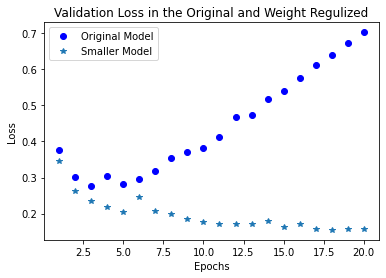

In [18]:
import matplotlib.pyplot as plt
    
def plot_val_loss():

    original_dict = original.history
    original_val_loss = original_dict['val_loss']
    history_dict = history.history
    history_val_loss = history_dict['val_loss']


    epochs = range(1, len(original_val_loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, original_val_loss, blue_dots, label = 'Original Model')
    plt.plot(epochs, history_val_loss, '*', label = 'Smaller Model')
    plt.title('Validation Loss in the Original and Weight Regulized')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_val_loss()



> We can see that by adding L2 regulizer the model only starts to overfit after the 5th epochs but later on it still improves opposing the original model.



### 3. Adding dropout.

By adding 2 dropout layers to our network. Dropout randomly turns numbers in a vector to 0. This helps to prevent conspiracies there it regulizes our network.


In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5997 - accuracy: 0.6693 - val_loss: 0.4326 - val_accuracy: 0.8810
Epoch 2/20
49/49 [==============================] - 1s 30ms/step - loss: 0.4441 - accuracy: 0.8076 - val_loss: 0.2824 - val_accuracy: 0.9113
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.3546 - accuracy: 0.8616 - val_loss: 0.2167 - val_accuracy: 0.9275
Epoch 4/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2976 - accuracy: 0.8902 - val_loss: 0.1800 - val_accuracy: 0.9380
Epoch 5/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2644 - accuracy: 0.9071 - val_loss: 0.1526 - val_accuracy: 0.9491
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2350 - accuracy: 0.9192 - val_loss: 0.1308 - val_accuracy: 0.9573
Epoch 7/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2105 - accuracy: 0.9307 - val_loss: 0.1173 - val_accuracy: 0.9631
Epoch 8/20
49

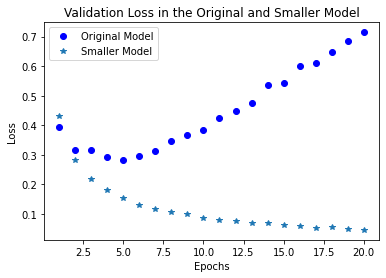

In [31]:
import matplotlib.pyplot as plt
    
def plot_val_loss():

    original_dict = original.history
    original_val_loss = original_dict['val_loss']
    history_dict = history.history
    history_val_loss = history_dict['val_loss']


    epochs = range(1, len(original_val_loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, original_val_loss, blue_dots, label = 'Original Model')
    plt.plot(epochs, history_val_loss, '*', label = 'Smaller Model')
    plt.title('Validation Loss in the Original and Smaller Model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_val_loss()



> We can see that by adding dropout the model stops overfitting. and it achieves an 88% accuracy without reducing the epochs.



In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 44ms/step - loss: 0.5938 - accuracy: 0.6781 - val_loss: 0.4105 - val_accuracy: 0.8839
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.4411 - accuracy: 0.8049 - val_loss: 0.2797 - val_accuracy: 0.9125
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.3555 - accuracy: 0.8574 - val_loss: 0.2161 - val_accuracy: 0.9301
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2796 - accuracy: 0.8903




> By reducing the number of epochs to 4 and adding dropout layers we could reach the highest accuracy comparing to other models which we have tried today. 89%.

